In [78]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 載入紅酒資料集
wine = load_wine()

# 將資料分成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1, random_state=1)



In [79]:
#檢視X
import pandas as pd
X_train_df = pd.DataFrame(X_train, columns=wine.feature_names)
X_train_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.42,2.55,2.27,22.0,90.0,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315.0
1,13.58,1.66,2.36,19.1,106.0,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515.0
2,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0
3,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0
4,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0


In [80]:
#檢視y
y_train_df = pd.DataFrame(y_train, columns=["target"])
y_train_df.head()

,target
0,1
1,0
2,0
3,1
4,2


In [81]:
#建立決策樹模型

DT = DecisionTreeClassifier()

# 使用訓練資料進行訓練
DT.fit(X_train, y_train)

# 使用測試集預測紅酒類別
y_pred = DT.predict(X_test)

# 評估模型準確度
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(DT, X_train, y_train, cv=cv)

print(f'Cross-validation scores: {scores}')
print(f'Mean score: {scores.mean()}')

Cross-validation scores: [0.9375 0.875  0.875  0.9375 0.9375 0.9375 0.875  1.     0.875  0.875 ]
Mean score: 0.9125


[Text(0.5294117647058824, 0.9166666666666666, 'x[12] <= 755.0\ngini = 0.659\nsamples = 160\nvalue = [52, 64, 44]'),
 Text(0.29411764705882354, 0.75, 'x[11] <= 2.115\ngini = 0.485\nsamples = 99\nvalue = [1, 60, 38]'),
 Text(0.4117647058823529, 0.8333333333333333, 'True  '),
 Text(0.17647058823529413, 0.5833333333333334, 'x[10] <= 0.935\ngini = 0.245\nsamples = 42\nvalue = [0, 6, 36]'),
 Text(0.11764705882352941, 0.4166666666666667, 'x[6] <= 1.58\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.058823529411764705, 0.25, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]'),
 Text(0.17647058823529413, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.23529411764705882, 0.4166666666666667, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.4117647058823529, 0.5833333333333334, 'x[6] <= 0.795\ngini = 0.101\nsamples = 57\nvalue = [1, 54, 2]'),
 Text(0.35294117647058826, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.47058823529411764, 0.41666666

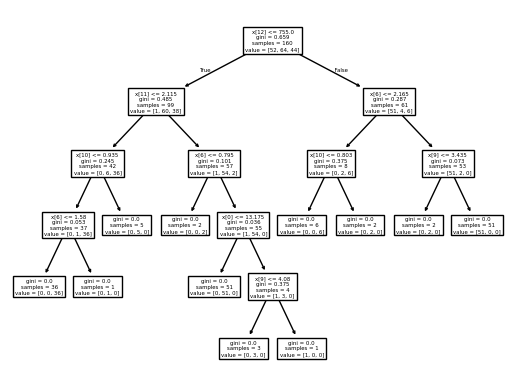

In [82]:
#畫圖
from sklearn import tree
tree.plot_tree(DT)

In [83]:
#輸出規則
r = export_text(DT, feature_names=wine.feature_names)
print(r)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- hue <= 0.94
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |   |--- hue >  0.94
|   |   |   |--- class: 1
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- alcohol <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.17
|   |   |   |   |--- color_intensity <= 4.08
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- color_intensity >  4.08
|   |   |   |   |   |--- class: 0
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- hue <= 0.80
|   |   |   |--- class: 2
|   |   |--- hue >  0.80
|   |   |   |--- class: 1
|   |--- flavanoids >  2.17
|   |   |--- color_intensity <= 3.43
|   |   |   |--- class: 1
|   |   |--- color_intensity >  3.43
|   |   |   |--- class: 0



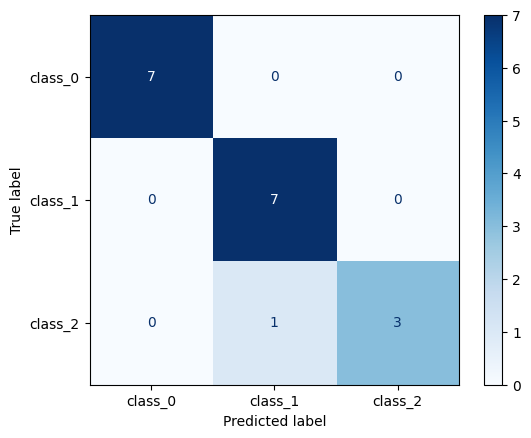

In [84]:
# 計算混淆矩陣
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)

# 作圖
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [85]:
# 評估模型
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.88      1.00      0.93         7
           2       1.00      0.75      0.86         4

    accuracy                           0.94        18
   macro avg       0.96      0.92      0.93        18
weighted avg       0.95      0.94      0.94        18



In [86]:
from sklearn.neural_network import MLPClassifier
#建立MLP模型

MLP = MLPClassifier()

# 使用訓練資料進行訓練
MLP.fit(X_train, y_train)

# 使用測試集預測紅酒類別
y_pred = MLP.predict(X_test)

# 評估模型準確度
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(MLP, X_train, y_train, cv=cv)

print(f'Cross-validation scores: {scores}')
print(f'Mean score: {scores.mean()}')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation scores: [0.9375 0.125  0.8125 0.375  0.875  0.5    0.875  0.9375 0.375  0.5   ]
Mean score: 0.63125


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


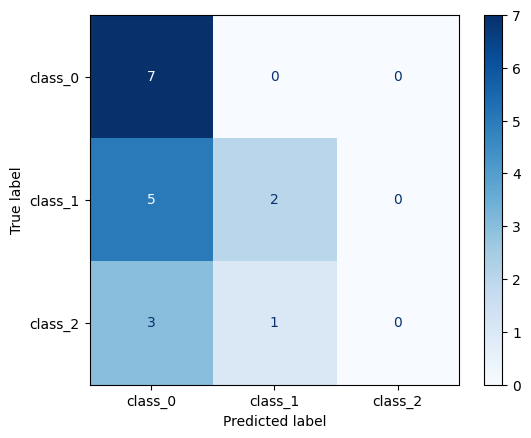

In [87]:
# 計算混淆矩陣
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)

# 作圖
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [88]:
# 評估模型
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64         7
           1       0.67      0.29      0.40         7
           2       0.00      0.00      0.00         4

    accuracy                           0.50        18
   macro avg       0.38      0.43      0.35        18
weighted avg       0.44      0.50      0.40        18



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
